In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()

In [3]:
%matplotlib inline

In [4]:
df_bkts = pd.read_csv("../data/age_gender_bkts.csv")

- 총 갯수 420개 = age_bucket(21) * country(10) * gender(2)
- year는 2015로 고정
- 그러므로 카테고리 420개에 대한 population_in_thousands 값이다.
- 인구통계조사기관에서 작성한 데이터 란다;;;

- age_bucket : 5단위로 나누어져 있다. 총 21개
- country_destination : 처음 여행을 간 국가(10)
  - AU(호주), CA(캐나다), DE(독일), ES(스페인), FR(프랑스), GB(영국), IT(이탈리아), NL(네덜란드), PT(포르투갈), US(미국)
- gender : 성별
- population inthousands : 인구 단위 천명

- 예를 들어
- age : 90-94, country : US, gender : male, populationa : 1
- 나이가 90-94세인 남성의 첫 여행이 미국인 숫자는 1000명

In [5]:
df_bkts["country_destination"].unique()

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US'], dtype=object)

In [6]:
df_bkts.tail()

,age_bucket,country_destination,gender,population_in_thousands,year
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0
419,80-84,US,male,2442.0,2015.0


### 데이터 나라-나이-성별로 정렬

In [7]:
df_bkts["age_bucket"] = df_bkts["age_bucket"].replace({"0-4":"00-4", "5-9":"05-9", "100+":"99++"})

In [8]:
df_bkts.sort_values(by=["country_destination", "age_bucket", "gender"], inplace = True)
df_bkts.reset_index(drop=True, inplace = True)

## 1. 결측값 확인

In [9]:
df_bkts.isnull().sum()

age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64

## 2. county - population_in_thousands(sum)

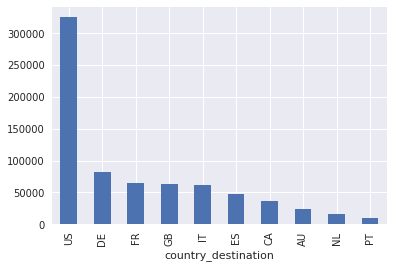

In [10]:
df_bkts.groupby(["country_destination"])["population_in_thousands"].sum().sort_values(ascending = False).plot(kind='bar')

- 미국이 첫여행지인 사람들이 압도적으로 많다

## 3. gender - population_in_thousands(sum)

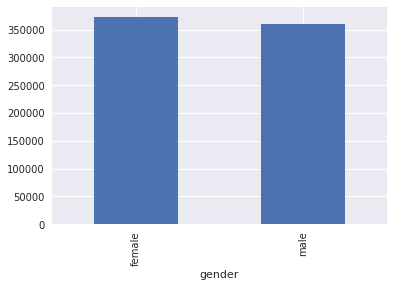

In [11]:
df_bkts.groupby(["gender"])["population_in_thousands"].sum().sort_values(ascending = False).plot(kind='bar')

In [12]:
df_bkts.groupby(["gender"])["population_in_thousands"].sum().sort_values(ascending = False)

gender
female    372207.0
male      359909.0
Name: population_in_thousands, dtype: float64

- 여성의 수가 130000명 많다

## 4. age - population_in_thousands(sum)

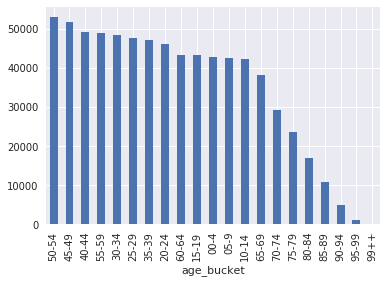

In [18]:
df_bkts.groupby(["age_bucket"])["population_in_thousands"].sum().sort_values(ascending = False).plot(kind='bar')

- 40-59가 가장 많이 분포해 있고 
- 20-39가 두번째이다.
- 0-19 or 60-64가 세번째
- 그다음은 나이가 있을 수록 적어진다.

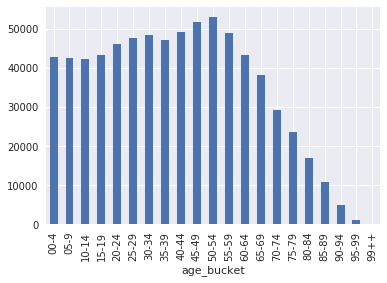

In [19]:
df_bkts.groupby(["age_bucket"])["population_in_thousands"].sum().plot(kind='bar')

- 15-34까지 조금씩 증가
- 35-39에 살짝 주춤
- 40-54까지 제일 가파르게 증가
- 55이후 지속적으로 감소

## 5. 전체 확인(나라별 age와 gender에 따른 population_in_thousands)

In [14]:
df_bkts_US = df_bkts[df_bkts["country_destination"] == "US"]

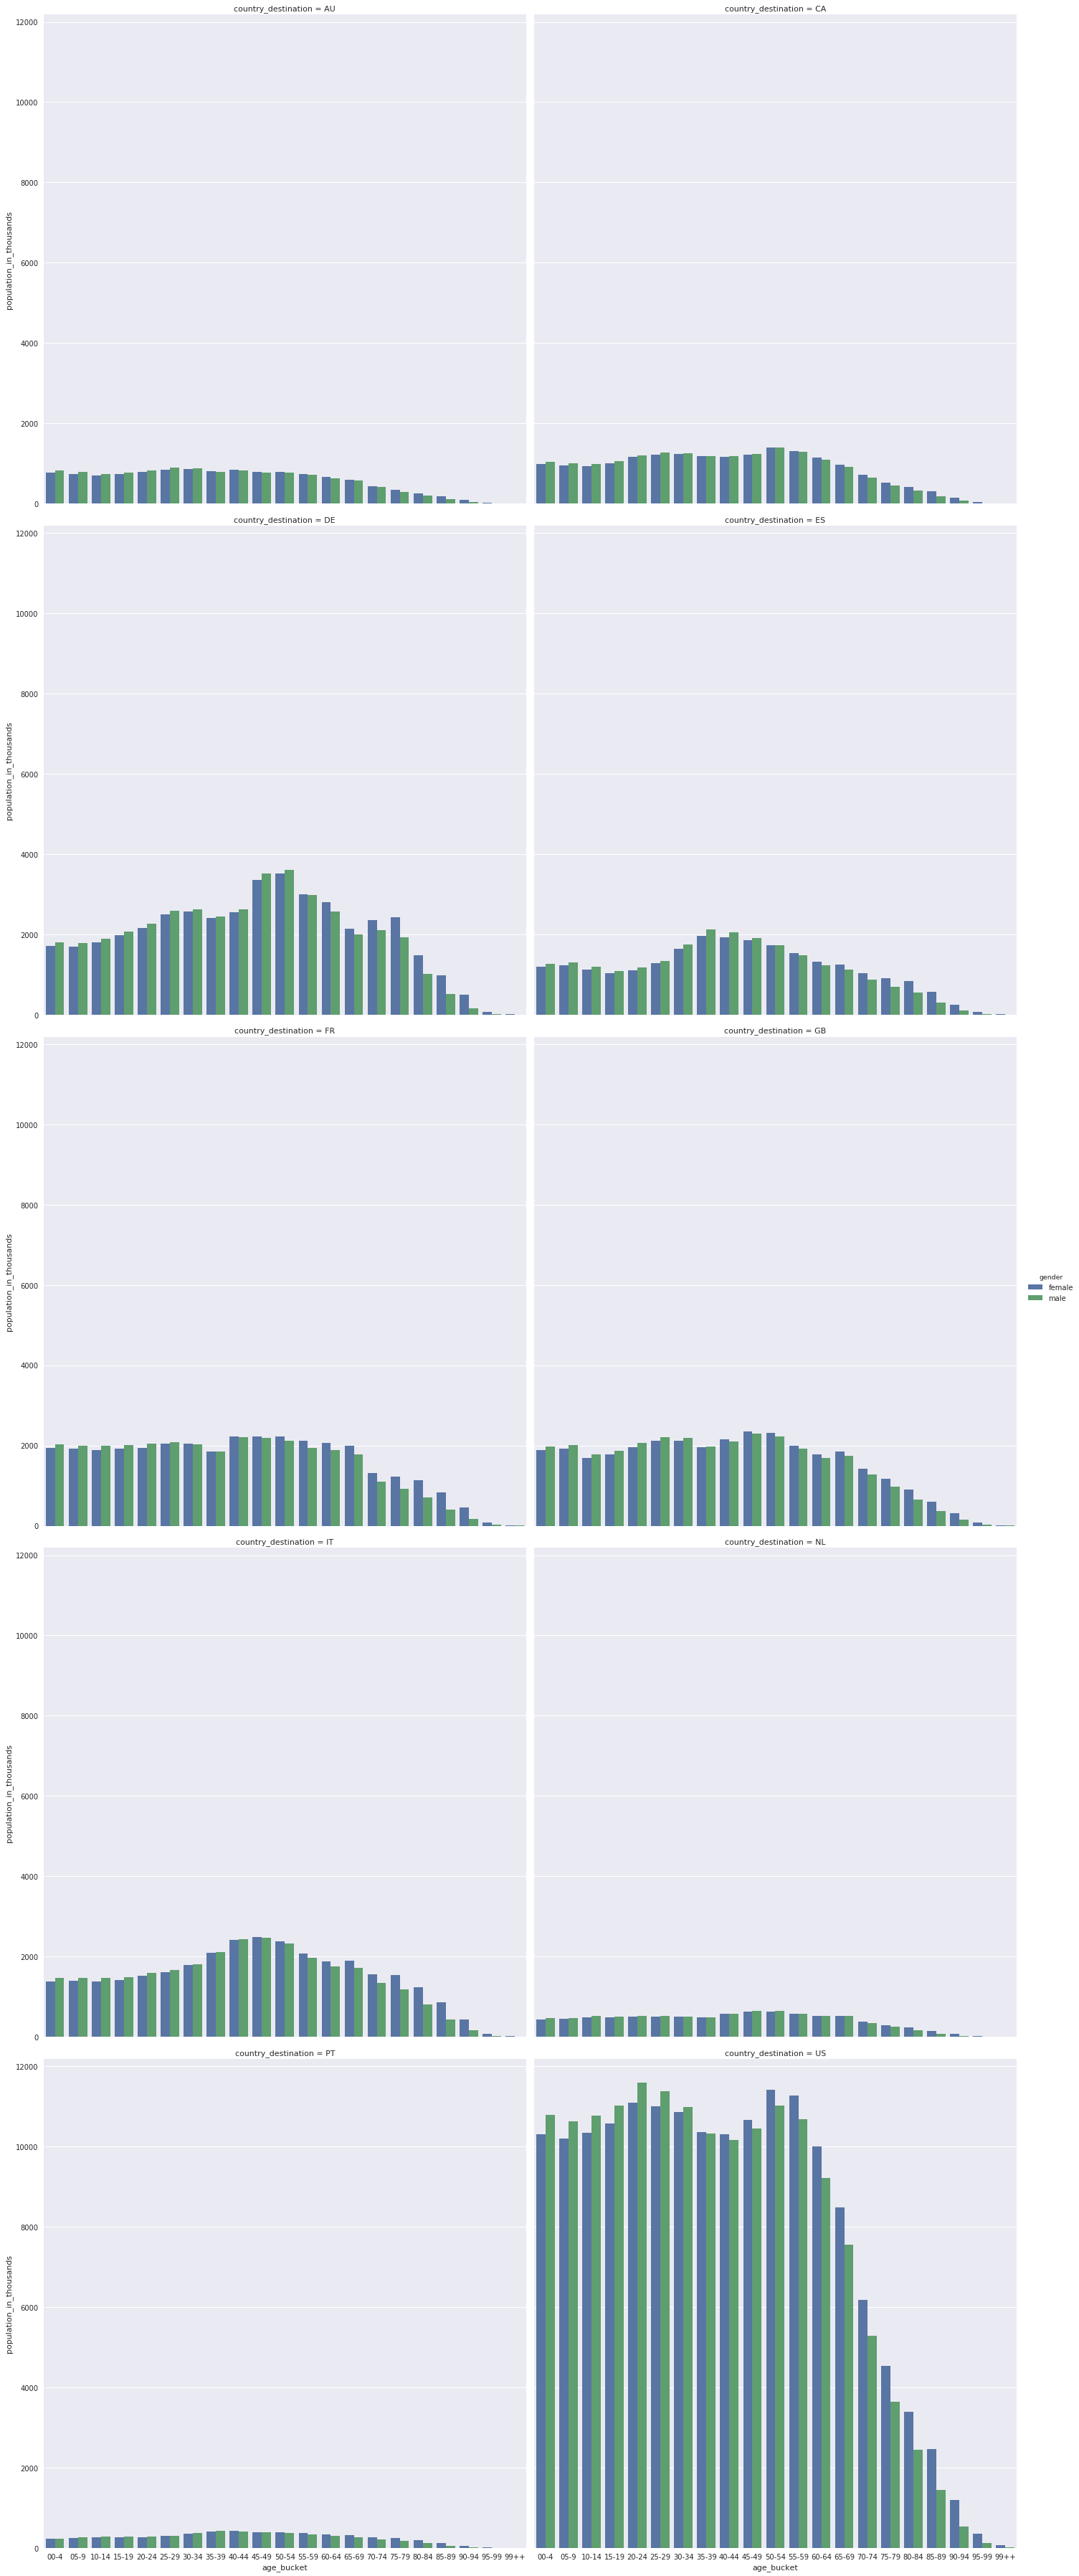

In [15]:
plot = sns.factorplot(x="age_bucket", y="population_in_thousands", col="country_destination", hue = "gender", data=df_bkts,
                      col_wrap = 2, size=10, kind="bar")

- 큰 차이는 나지 않지만 나이가 들어가면서 여성이 여행을 가는 비중이 커진다.
- 미국을 기준으로 35세부터 여성이 더 여행을 많이 간다.

## 6. 나이별 남녀 차이 비중

In [23]:
df_bkts_group = df_bkts.groupby(["age_bucket", "gender"])["population_in_thousands"].sum()

In [47]:
df_bkts_group.index

MultiIndex(levels=[['00-4', '05-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '99++'], ['female', 'male']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['age_bucket', 'gender'])

In [55]:
df_diff_sex = pd.DataFrame(df_bkts_group.values[0::2] - df_bkts_group.values[1::2], 
                           index = df_bkts_group.index.levels[0], columns = ["diff(f-m)"])

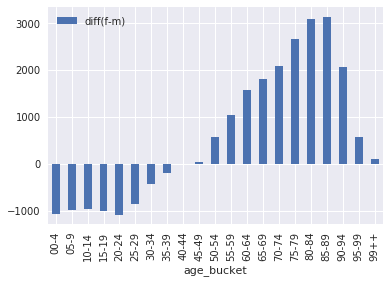

In [56]:
df_diff_sex.plot(kind='bar')

- 0-39세 까지 남성이 더 많다가
- 45-99+세 까지는 여성이 더 많아 진다,